In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
sys.path.insert(0,'C:\\Users\\-------------------------------')

import graph as gr
import perturbation as prtb
import deterministic as dtm
import time_evolution as te
import monte_carlo as mc
import examination as exam
import illustration as illu
#import scipy as sp

## Set all parameters

In [2]:
z= 10000
n= 500
eps = 20
alpha = 3
stepwidth = dt = 0.1
t_end = 20
p =10
numPerturbations = k = 5
#eps2 = z/n*p*eps*dt    #to obtain same result for Monte Carlo and deterministic simulation

perturbationMode = {'mode': 'explicitPerturbation', 'arg': [[*range(0, 10)],
                                                            [*range(10, 20)],
                                                            [*range(200, 210)],
                                                            [*range(30, 40)],
                                                            [*range(40, 50)]
                                                               ]}

# For feed-forward perturbation
# perturbationMode = {'mode': 'explicitPerturbation', 'arg': [[range(0, 1), range(0, 1)],
#                                                             [range(1, 2), range(0, 1)],
#                                                             [range(2, 3), range(0, 1)],
#                                                             [range(3, 4), range(0, 1)],
#                                                             [range(4, 5), range(0, 1)]
#                                                                ]}


perturbationTime = {'manuel':[[1],[4], [7], [10], [13]]}
perturbationType = 'vertices'#'feedforward'

#rates = {'alpha':alpha, 'beta': 0, 'epsilon':eps}

#print('Probability of breaking one edge: {}'.format(1-np.exp(-eps*stepwidth)))

## Create all class objects

In [3]:
########################################## Deterministic ################################################

rates_det = {'alpha':alpha, 'beta': 0, 'epsilon':eps/(z/n*p*dt)}   
#eps/(z/n*p*dt)=not rate but the actual number of broken edges

graph_det = gr.Graph(n, z,rates_det, vectors='uniform', connected=1, MC= False)
    
perturbation_det = prtb.Perturbation(graph_det, numPerturbations, rates_det, perturbationMode=perturbationMode,
                                           perturbationTime=perturbationTime,
                                           perturbationType = perturbationType, MC = False)

deterministic = dtm.Deterministic(graph_det, stepwidth, t_end, shift= False)

simulation_det = te.TimeEvolution(perturbation_det, graph_det, deterministic, MC = False)

examination_det = exam.Examination(graph_det, simulation_det, indices = [19],
                                  inhibition = 0, perturbation= perturbation_det,
                                  eigenvalues = True, trace = True, coefficient_matrix=False,
                                  gain = 1, zeroth_row_col = False)

illustration_det = illu.Illustration(perturbation_det, examination_det)

########################################## Monte Carlo #################################################

rates_MC = {'alpha':alpha, 'beta': 0, 'epsilon':eps/(z/n*p*dt)}

graph_MC = gr.Graph(n, z,rates_MC, vectors='uniform', connected=1, MC= True) 

perturbation_MC = prtb.Perturbation(graph_MC, numPerturbations, rates_MC, perturbationMode=perturbationMode,
                                           perturbationTime=perturbationTime,
                                           perturbationType = perturbationType, MC = True)

monte_carlo= mc.MonteCarlo(graph_MC, stepwidth, t_end,inh = False, shift= False)
# For network with inhibition turn inh = True and in Examination: inhibition = value (positiv to get negativ weight)

simulation_MC = te.TimeEvolution(perturbation_MC, graph_MC, monte_carlo, MC = True)

examination_MC = exam.Examination(graph_MC, simulation_MC, [19],
                                  inhibition = 0, perturbation= perturbation_MC,
                                  eigenvalues = True, trace = True, coefficient_matrix=False,
                                  gain = 1, zeroth_row_col = False)

illustration_MC = illu.Illustration(perturbation_MC, examination_MC)

## Illustrate results

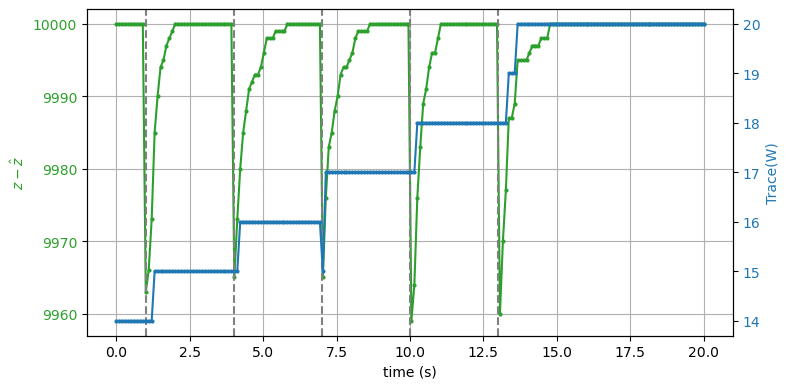

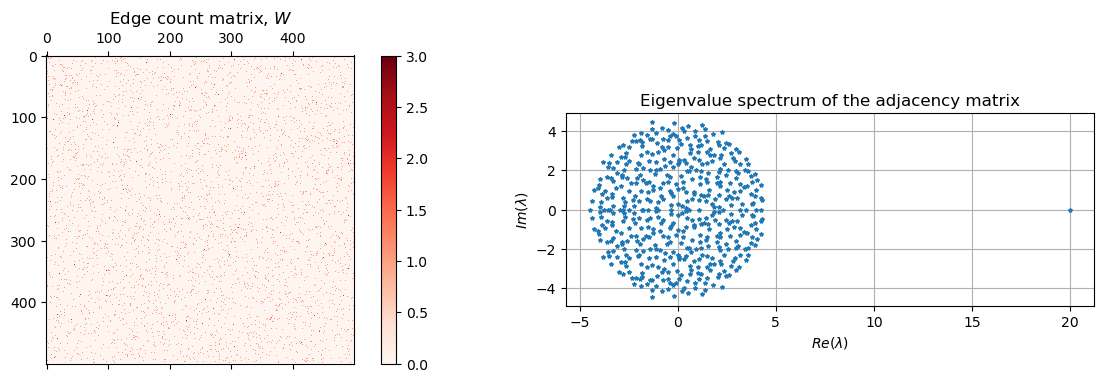

In [4]:
illustration_MC.plot_connected_edges_and_traces()
illustration_MC.plot_matrix_and_eigenvalues()

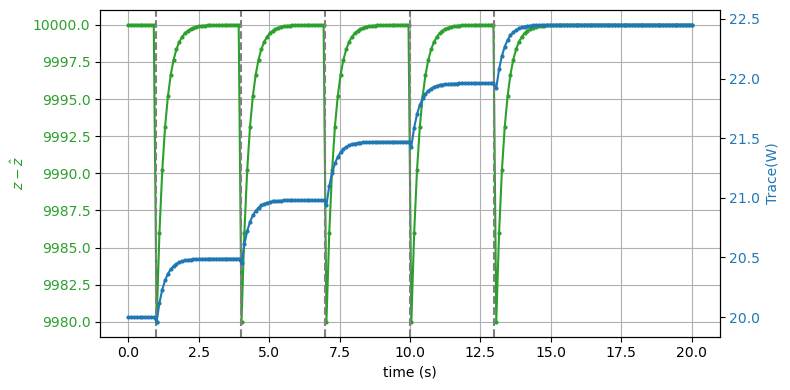

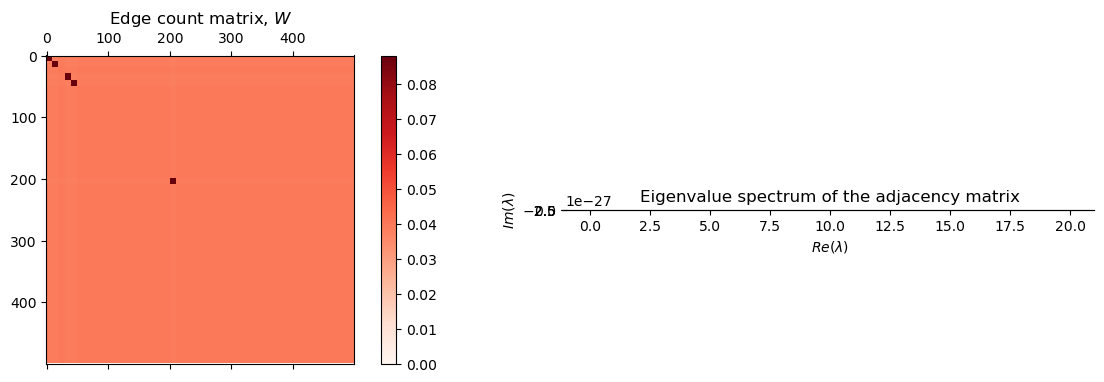

In [5]:
illustration_det.plot_connected_edges_and_traces()
illustration_det.plot_matrix_and_eigenvalues()

## Functions and variabels

In [6]:
###############P and N vectors:

P1 = perturbation_det.P_vectors[0] 
#P2 = perturbation_det.P_vectors[1] ...
# For feed-forward pattern P_row_vectors, P_col_vectors instead

N = graph_det.uniform

############## Edge count matrix

W = examination_det.edge_count_matrices[0]  
#only at time points given in indices generated, here only at t= 19
#list of length len(indices)

############## Egenvalues and eigenvectors
ev = examination_det.eigenvalues[0]
#only eigenvalues at t = 19 calculated
e_vec = examination_det.eigenvectors[0]


############# Coarse graining left eigenvectors
#CG = np.linalg.qr(np.array([P1,P2,P3,P4,P5, N]).T)[0].T
#W_CG = np.dot(CG, np.dot(W, np.conjugate(CG).T))
#ev_cg = np.linalg.eigvals(W_CG)


############Animate temporal course of the eigenvalue spectrum
## for indices use: indices = [*range(t_end)]

# anim = illustration_MC.animate_eigenvalues(ev_cg)  
# the input (here:ev_cg) will be plotted in addition to the actual eigenvalues

# HTML(anim.to_html5_video())

## Coarse graining example

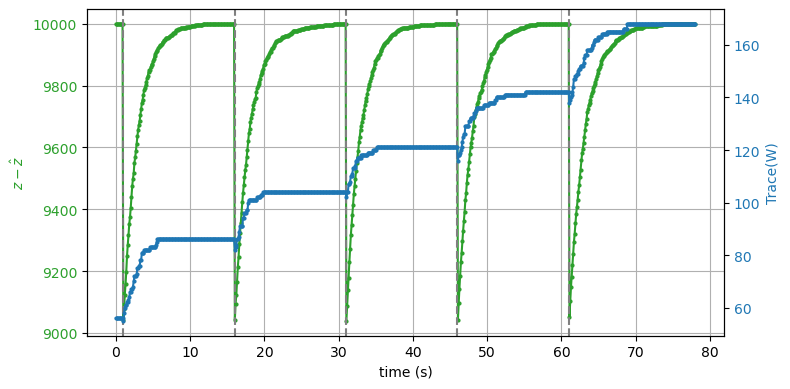

In [7]:
z= 10000
n= 200
eps = 2000
alpha = 0.5
stepwidth = dt = 0.1
t_end = 78
p =10
numPerturbations = k = 5
#eps2 = z/n*p*eps*dt    #to obtain same result for Monte Carlo and deterministic simulation

perturbationMode = {'mode': 'explicitPerturbation', 'arg': [[*range(0, 10)],
                                                            [*range(10, 20)],
                                                            [*range(100, 110)],
                                                            [*range(30, 40)],
                                                            [*range(40, 50)]
                                                               ]}

# For feed-forward perturbation
# perturbationMode = {'mode': 'explicitPerturbation', 'arg': [[range(0, 1), range(0, 1)],
#                                                             [range(1, 2), range(0, 1)],
#                                                             [range(2, 3), range(0, 1)],
#                                                             [range(3, 4), range(0, 1)],
#                                                             [range(4, 5), range(0, 1)]
#                                                                ]}


perturbationTime = {'manuel':[[1],[16], [31], [46], [61]]}
perturbationType = 'vertices'#'feedforward'

#rates = {'alpha':alpha, 'beta': 0, 'epsilon':eps}

#print('Probability of breaking one edge: {}'.format(1-np.exp(-eps*stepwidth)))

rates_MC = {'alpha':alpha, 'beta': 0, 'epsilon':eps/(z/n*p*dt)}

graph_MC = gr.Graph(n, z,rates_MC, vectors='uniform', connected=1, MC= True) 

perturbation_MC = prtb.Perturbation(graph_MC, numPerturbations, rates_MC, perturbationMode=perturbationMode,
                                           perturbationTime=perturbationTime,
                                           perturbationType = perturbationType, MC = True)

monte_carlo= mc.MonteCarlo(graph_MC, stepwidth, t_end,inh = False, shift= False)
# For network with inhibition turn inh = True and in Examination: inhibition = value (positiv to get negativ weight)

simulation_MC = te.TimeEvolution(perturbation_MC, graph_MC, monte_carlo, MC = True)

examination_MC = exam.Examination(graph_MC, simulation_MC, [*range(t_end)],
                                  inhibition = 0, perturbation= perturbation_MC,
                                  eigenvalues = True, trace = True, coefficient_matrix=False,
                                  gain = 1, zeroth_row_col = False)

illustration_MC = illu.Illustration(perturbation_MC, examination_MC)

illustration_MC.plot_connected_edges_and_traces()
#illustration_MC.plot_matrix_and_eigenvalues()

In [8]:
#####Create animation of the eigenvalue spectrum

P1 = perturbation_MC.P_vectors[0] 
P2 = perturbation_MC.P_vectors[1] 
P3 = perturbation_MC.P_vectors[2] 
P4 = perturbation_MC.P_vectors[3] 
P5 = perturbation_MC.P_vectors[4] 
N = graph_MC.uniform


############# Coarse graining left eigenvectors
CG = np.linalg.qr(np.array([P1,P2,P3,P4,P5, N]).T)[0].T

#W = examination_MC.edge_count_matrices[t_end-1]   #for the last matrix
#W_CG = np.dot(CG, np.dot(W, np.conjugate(CG).T))


ev_cg = []
for i in range(t_end):
    W = examination_MC.edge_count_matrices[i]
    ev_cg.append(np.linalg.eigvals(np.dot(CG, np.dot(W, np.conjugate(CG.T)))))


############Animate temporal course of the eigenvalue spectrum
## for indices use: indices = [*range(t_end)]

anim = illustration_MC.animate_eigenvalues(ev_cg)  
# the input (here:ev_cg) will be plotted in addition to the actual eigenvalues

HTML(anim.to_html5_video())
#black dots are coarse grained eigenvalues 